# **Alcohol Effects on Study**

The aim of this project is to find out how alcohol intake effects students on their studies.

Data source: https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

# **1. Data Cleaning**

1.   First we detect the missing values.
2.   If there are any missing values we will either remove them or replace them with the mean, if there aren't any we don't have to do anything.



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from os.path import join
import pandas as pd
data_path = "/content/drive/My Drive/DSA210/"
filename = "Maths.csv"

maths_df = pd.read_csv(join(data_path, filename), delimiter=",")

In [3]:
maths_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
maths_df.isna().sum() # This shows that there are no missing values in this dataset

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [5]:

from os.path import join
import pandas as pd
data_path = "/content/drive/My Drive/DSA210/"
filename = "Portuguese.csv"

portuguese_df = pd.read_csv(join(data_path, filename), delimiter=",")

In [6]:
portuguese_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
portuguese_df.isna().sum() #This shows that there are no missing values in this dataset

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


# 2. Explatory Data Analysis & Data Visualization






In [8]:
import pandas as pd

maths_df["course"] = "Math"
portuguese_df["course"] = "Portuguese"

combined_df = pd.concat([maths_df, portuguese_df], ignore_index=True)
combined_df.shape, combined_df.columns.tolist(), combined_df.isnull().sum().sum() # ChatGpt helped write this line


((1044, 34),
 ['school',
  'sex',
  'age',
  'address',
  'famsize',
  'Pstatus',
  'Medu',
  'Fedu',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'traveltime',
  'studytime',
  'failures',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences',
  'G1',
  'G2',
  'G3',
  'course'],
 np.int64(0))

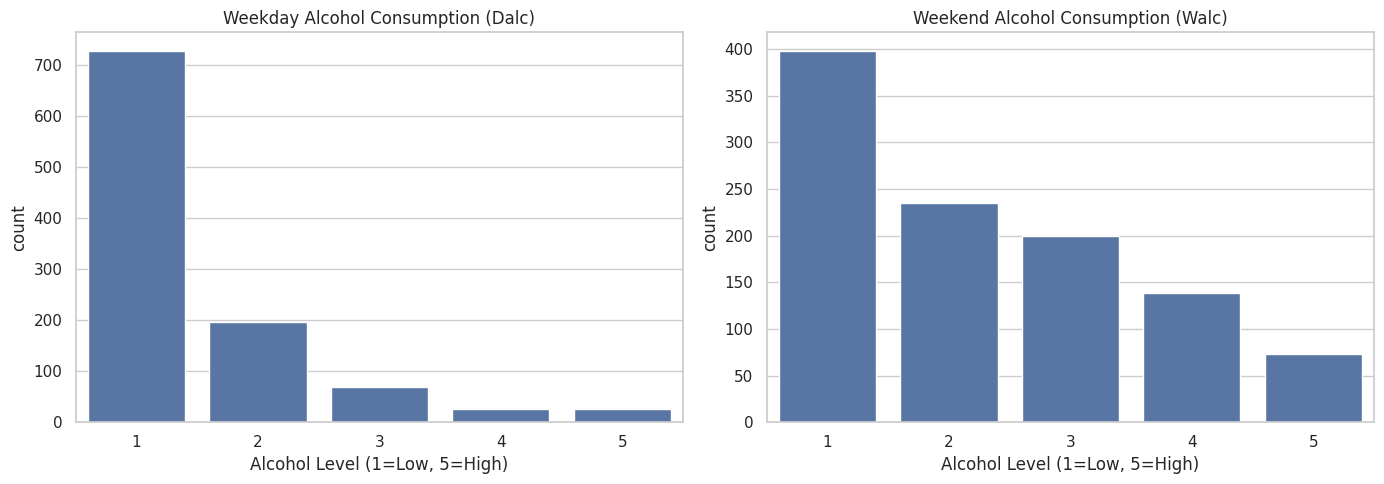

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#  Distribution of alcohol consumption
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=combined_df, x="Dalc", ax=axes[0])
axes[0].set_title("Weekday Alcohol Consumption (Dalc)")

axes[0].set_xlabel("Alcohol Level (1=Low, 5=High)")

sns.countplot(data=combined_df, x="Walc", ax=axes[1])
axes[1].set_title("Weekend Alcohol Consumption (Walc)")

axes[1].set_xlabel("Alcohol Level (1=Low, 5=High)")
plt.tight_layout()
plt.show()


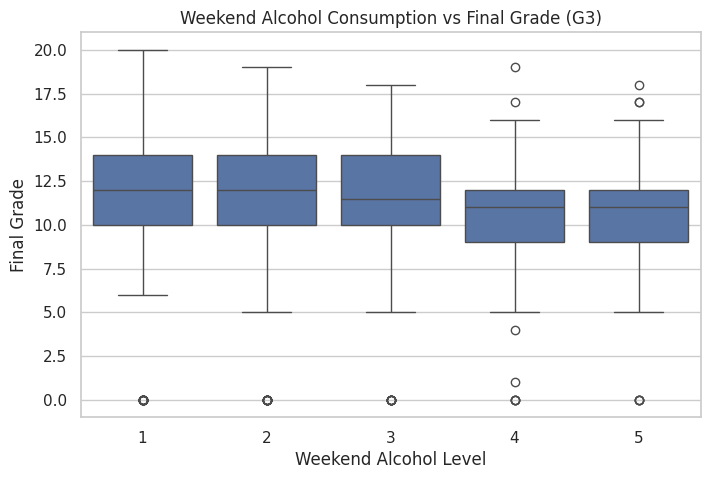

In [10]:
#Boxplot of alcohol consumption and final grade
plt.figure(figsize=(8, 5))
sns.boxplot(x="Walc", y="G3", data=combined_df)
plt.title("Weekend Alcohol Consumption vs Final Grade (G3)")
plt.xlabel("Weekend Alcohol Level")
plt.ylabel("Final Grade")
plt.show()

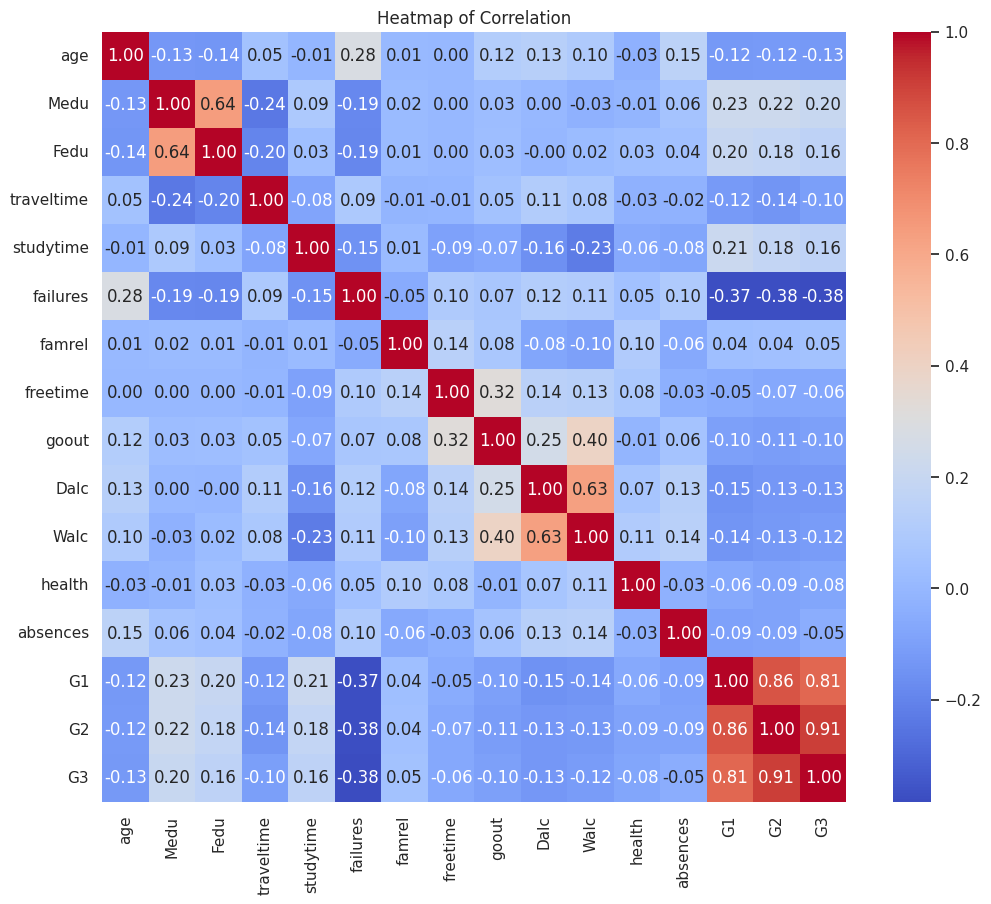

In [11]:
#heatmap
plt.figure(figsize=(12, 10))
numeric_columns = combined_df.select_dtypes(include='number') #ChatGpt helped with the heatmap
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlation")
plt.show()

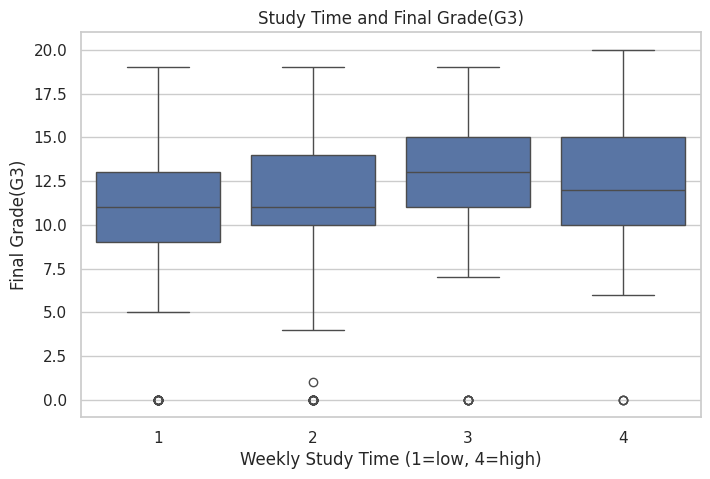

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Study Time and Final Grade
plt.figure(figsize=(8, 5))
sns.boxplot(x="studytime", y="G3", data=combined_df)
plt.title("Study Time and Final Grade(G3)")
plt.xlabel("Weekly Study Time (1=low, 4=high)")
plt.ylabel("Final Grade(G3)")
plt.show()


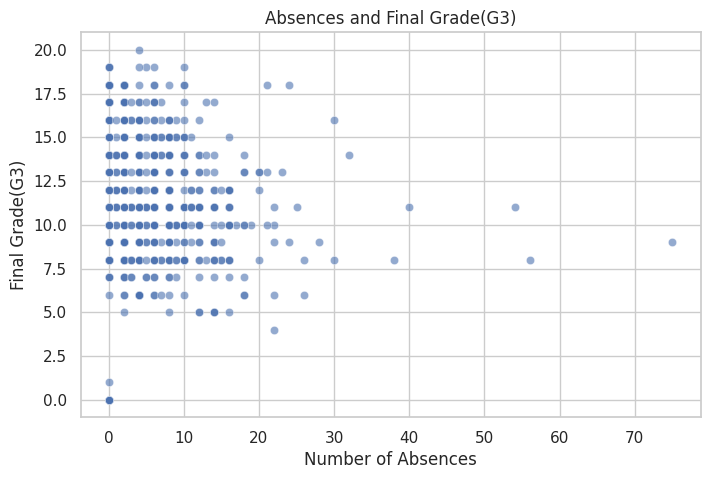

In [15]:
# Absences and Final Grade
plt.figure(figsize=(8, 5))
sns.scatterplot(x="absences", y="G3", data=combined_df, alpha=0.6) # chatgpt helped this line and matching the label names
plt.title("Absences and Final Grade(G3)")
plt.xlabel("Number of Absences")

plt.ylabel("Final Grade(G3)")
plt.show()

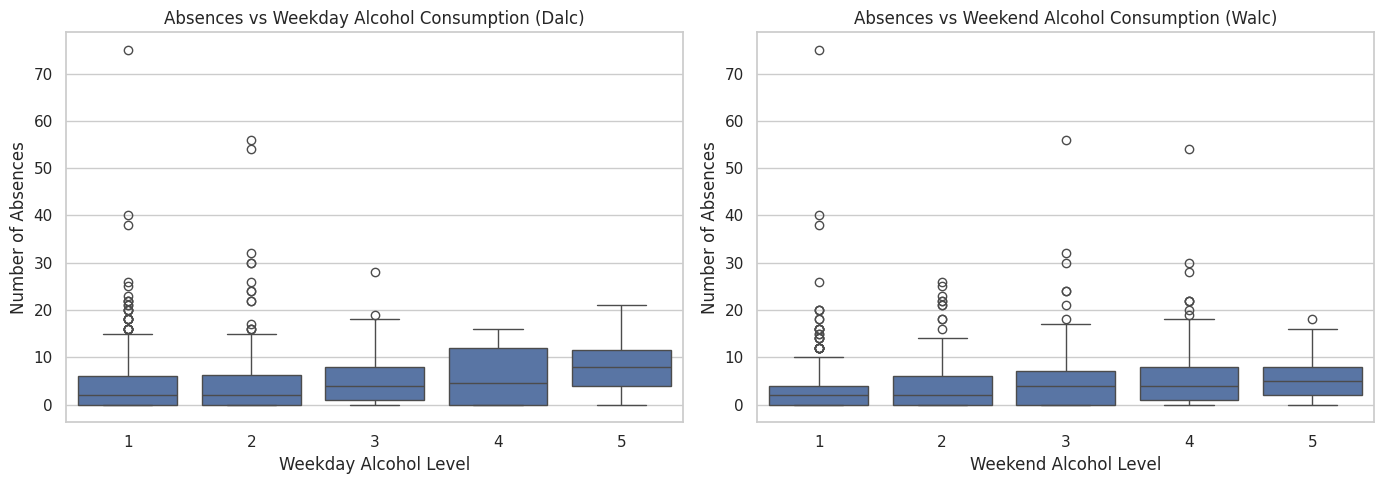

In [16]:
#Absences v Alcohol Consumption
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekday alcohol consumption vs absences
sns.boxplot(x="Dalc", y="absences", data=combined_df, ax=axes[0])
axes[0].set_title("Absences vs Weekday Alcohol Consumption (Dalc)")
axes[0].set_xlabel("Weekday Alcohol Level")
axes[0].set_ylabel("Number of Absences")

# Weekend alcohol consumption vs absences
sns.boxplot(x="Walc", y="absences", data=combined_df, ax=axes[1])
axes[1].set_title("Absences vs Weekend Alcohol Consumption (Walc)")
axes[1].set_xlabel("Weekend Alcohol Level")
axes[1].set_ylabel("Number of Absences")

plt.tight_layout()
plt.show()


# 3.Hypothesis Testing
Hypothesis: Students who consume more alcohol have lower final grades.

In [17]:
from scipy.stats import ttest_ind # ChatGpt helped with the t-test

# Split into two groups based on alcohol consumption levels
combined_df["alcohol_avg"] = (combined_df["Dalc"] + combined_df["Walc"]) / 2

#"low" and "high" alcohol consumption groups
low_alcohol = combined_df[combined_df["alcohol_avg"] <= 2]["G3"]
high_alcohol = combined_df[combined_df["alcohol_avg"] > 2]["G3"]

#t-test
t_stat, p_value = ttest_ind(low_alcohol, high_alcohol, equal_var=False)

mean_low = low_alcohol.mean()
mean_high = high_alcohol.mean()

t_stat, p_value, mean_low, mean_high


(np.float64(4.023157039109706),
 np.float64(6.417163465611425e-05),
 np.float64(11.640710382513662),
 np.float64(10.64102564102564))